### Reads the CSV file into a Pandas DataFrame named 'df'

In [1]:
import pandas as pd
file = r"C:\Users\pinis\Downloads\un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)

session  year country                     country_name  \
0        25  1970     ALB                          Albania   
1        25  1970     ARG                        Argentina   
2        25  1970     AUS                        Australia   
3        25  1970     AUT                          Austria   
4        25  1970     BEL                          Belgium   
5        25  1970     BLR                          Belarus   
6        25  1970     BOL  Bolivia, Plurinational State of   
7        25  1970     BRA                           Brazil   
8        25  1970     CAN                           Canada   
9        25  1970     CMR                         Cameroon   
10       25  1970     COG                            Congo   
11       25  1970     COL                         Colombia   
12       25  1970     CRI                       Costa Rica   
13       25  1970     CUB                             Cuba   
14       25  1970     DOM               Dominican Republic   
15       25  1970     DZA                          Algeria   
16       25  1970     ECU                          Ecuador   
17       25  1970     FRA                           France   
18       25  1970     GBR                   United Kingdom   
19       25  1970     GHA                            Ghana   

                  speaker    position  \
0                 Mr. NAS         NaN   
1      Mr. DE PABLO PARDO         NaN   
2             Mr. McMAHON         NaN   
3      Mr. KIRCHSCHLAEGER         NaN   
4              Mr. HARMEL         NaN   
5          Mr. GURINOVICH         NaN   
6      Mr. CAMACHO OMISTE         NaN   
7      Mr. GIBSON BARBOZA         NaN   
8               Mr. SHARP         NaN   
9              Mr. AHIDJO  President    
10            Mr. ICKONGA         NaN   
11  Mr. VASQUEZ CARRIZOSA         NaN   
12              Mr. FACIO         NaN   
13            Mr. ALARCON         NaN   
14        Mr FERNANDEZ G.               
15              Mr. YAZID         NaN   
16            Mr. Benites         NaN   
17           Mr. SCHUMANN         NaN   
18   Sir Alec DOUGLASHOME         NaN   
19              Mr. OWUSU         NaN   

                                                 text  
0   33: May I first convey to our President the co...  
1   177.\t : It is a fortunate coincidence that pr...  
2   100.\t  It is a pleasure for me to extend to y...  
3   155.\t  May I begin by expressing to Ambassado...  
4   176. No doubt each of us, before coming up to ...  
5   \n71.\t. We are today mourning the untimely de...  
6   135.\t  I wish to congratulate the President o...  
7   1.\tMr. President, I should like, first of all...  
8   \nThe General Assembly is fortunate indeed to ...  
9   : A year ago I came here as the Acting Preside...  
10  122.\t  I cannot begin my intervention without...  
11  Mr. President, this visit to the United Nation...  
12  62.\t  Mr. President, your election to the Pre...  
13  1.\t  Mr. President, I should first like to co...  
14  \n\n\n Mr. President, it was a source of great...  
15  1.  The delegation of Algeria is very pleased ...  
16  71.  It had been my hope that a loftier person...  
17  84.\t  Within one month, when we celebrate the...  
18  110.\t Mr. President, I should like first to s...  
19  121.\t I should like to begin by congratulatin...

### Downloading the stopwords from NLTK (Natural Language Toolkit) and printing the stopwords for the English language

In [2]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'yourself', 'until', "weren't", 'into', "should've", 'up', 'hers', 'most', 'm', 'some', 'ain', 'any', 'nor', 'mightn', "won't", 'on', 'we', 'when', 'should', "you'll", 'this', 'were', 'more', 'just', 'very', 'hasn', 'been', 'if', 'after', "you're", 'was', 'during', 'them', 'why', 'weren', "you'd", "she's", 'am', 'only', 'o', 'again', 'at', 'off', 'but', 'what', 'ourselves', 'whom', "hasn't", "shan't", 'itself', "needn't", 'which', "aren't", 't', 'and', 'as', 'a', 'to', 'him', 'over', 'having', 'here', 'each', "isn't", 'wasn', 'there', 'hadn', 'didn', 'its', 'our', 'are', 'these', 'while', 'won', 'her', 'by', 'with', 'out', 'how', 'y', 'theirs', 'has', "you've", 'once', "mustn't", 'shan', 'couldn', 're', 'doing', "wasn't", 'that', 'being', 'both', 'of', 's', 'did', 'few', 'ours', 'against', 'too', 'yours', 'd', 'i', 'so', "mightn't", 'myself', 'shouldn', 'then', 'is', 'other', "don't", 'down', 'he', 'now', 'own', 'his', 'their', 'from', 'above', "wouldn't", "hadn't", 'before', 'needn',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pinis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Building a text preprocessing pipeline using regular expressions

In [3]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

### The prepare function defined applies a preprocessing pipeline to each text in the 'text' column of the DataFrame df

In [4]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

### Calculates the frequency of each token in the 'tokens' column of the DataFrame df

In [5]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = "token"
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

freq
token                
nations        124508
united         120763
international  117223
world           89421
countries       85734
peace           72625
development     62632
states          59713
people          59338
security        58425

### Generates a word cloud visualization based on the frequency of tokens in the DataFrame freq_df

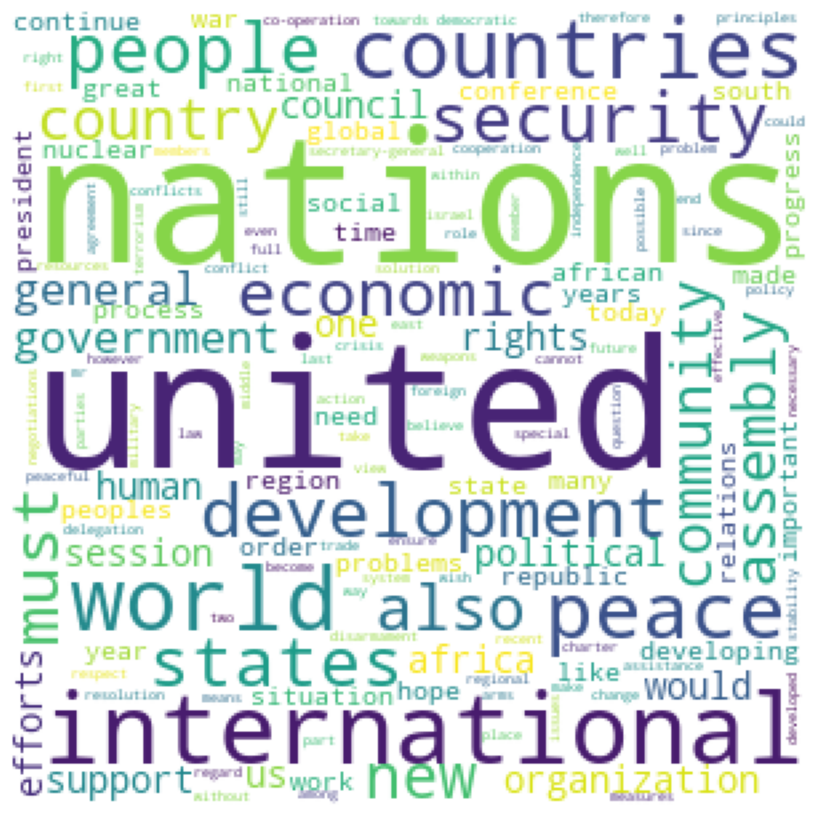

In [6]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### calculates the Inverse Document Frequency (IDF) for tokens in a DataFrame using function compute_idf

In [7]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

### Calculating the TF-IDF values for the tokens in dataset

In [8]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

freq         tfidf
token                              
nations        124508  12649.986284
united         120763  12285.608632
international  117223  12364.276226
world           89421   9503.708982
countries       85734  10888.485986

### word cloud visualization based on the TF-IDF values calculated for each token

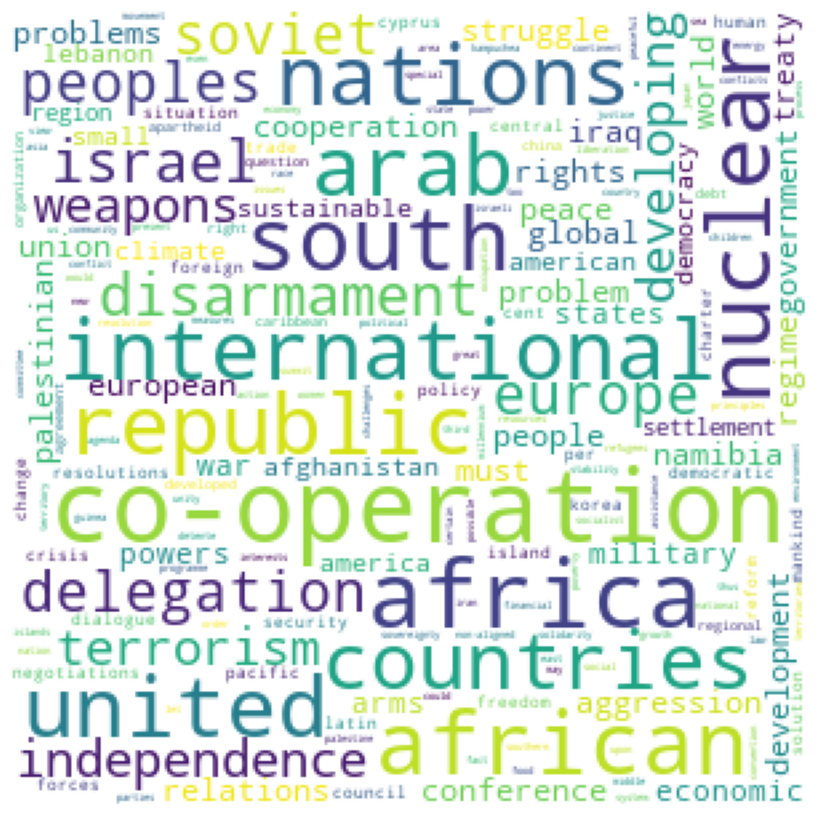

In [9]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### counts the occurrences of specific keywords within a list of tokens

In [10]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [11]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


### creating a heatmap using Seaborn to visualize the relative frequencies of specific keywords

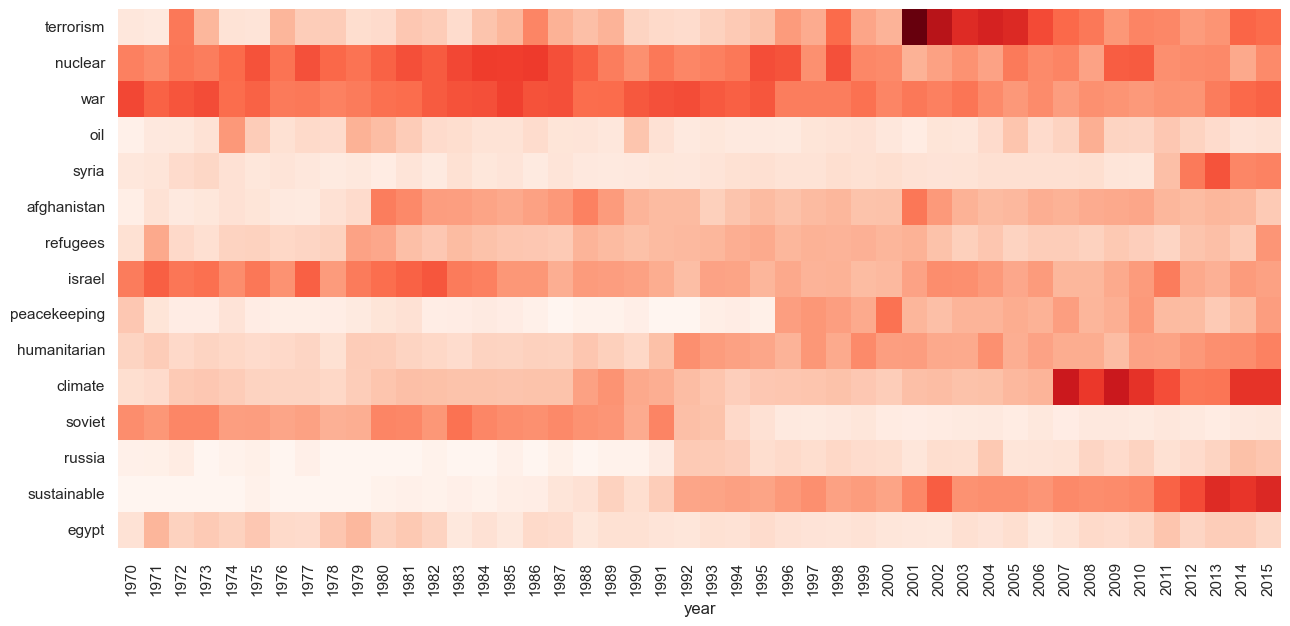

In [12]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


### For year 2010

In [13]:
file = r"C:\Users\pinis\Downloads\un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df= df[df['year']==2010]
df.head(20)

session  year country            country_name  \
6349       65  2010     AFG             Afghanistan   
6350       65  2010     AGO                  Angola   
6351       65  2010     ALB                 Albania   
6352       65  2010     AND                 Andorra   
6353       65  2010     ARE    United Arab Emirates   
6354       65  2010     ARG               Argentina   
6355       65  2010     ARM                 Armenia   
6356       65  2010     ATG     Antigua and Barbuda   
6357       65  2010     AUS               Australia   
6358       65  2010     AUT                 Austria   
6359       65  2010     AZE              Azerbaijan   
6360       65  2010     BDI                 Burundi   
6361       65  2010     BEL                 Belgium   
6362       65  2010     BEN                   Benin   
6363       65  2010     BFA            Burkina Faso   
6364       65  2010     BGD              Bangladesh   
6365       65  2010     BGR                Bulgaria   
6366       65  2010     BHR                 Bahrain   
6367       65  2010     BHS                 Bahamas   
6368       65  2010     BIH  Bosnia and Herzegovina   

                                               speaker  \
6349                                    Zalmai Rassoul   
6350                            Georges Rebelo Chikoti   
6351                                        Bamir Topi   
6352                           Jaume Bartumeau Cassany   
6353  His Highness Sheikh Abdullah Bin Zayed Al-Nahyan   
6354                                Cristina Fernandez   
6355                                 Edward Nalbandyan   
6356                            Winston Baldwin Spence   
6357                                        Kevin Rudd   
6358                               Michael Sindelegger   
6359                          Ilham Heydar oglu Aliyev   
6360                                 Gervais Rufyikiri   
6361                                  Steven Vanackere   
6362                                Jean-Marie Ehouzou   
6363                                    Michel Kafando   
6364                                     Sheikh Hasina   
6365                                 Nickolay Mladenov   
6366                Shaikh Khalid Bin Ahmed Al-Khalifa   
6367                          Theodore Brent Symonette   
6368                                   Haris Silajdzic   

                          position  \
6349  Minister for Foreign Affairs   
6350  Minister for Foreign Affairs   
6351                     President   
6352            Head of Government   
6353  Minister for Foreign Affairs   
6354                     President   
6355  Minister for Foreign Affairs   
6356                Prime Minister   
6357  Minister for Foreign Affairs   
6358  Minister for Foreign Affairs   
6359                     President   
6360                Vice-President   
6361         Deputy Prime Minister   
6362             UN Representative   
6363             UN Representative   
6364                Prime Minister   
6365  Minister for Foreign Affairs   
6366  Minister for Foreign Affairs   
6367         Deputy Prime Minister   
6368                     President   

                                                   text  
6349  I join previous \nspeakers in congratulating y...  
6350  First, I should \nlike to take this opportunit...  
6351  It is a \nspecial honour for me to address the...  
6352   It is certainly a great opportunity for the \...  
6353  At the outset, I congratulate you, Sir, \non y...  
6354  Most \nof the speeches we have heard so far to...  
6355  Each year, the great family of nations comes t...  
6356  Let me at \nthe outset commend you, Sir, on yo...  
6357  This great body has been \nin existence for tw...  
6358  The tragic \nearthquake in Haiti, the devastat...  
6359  I have the honour to join \nprevious speakers ...  
6360  Allow me first of all to convey to the Assembl...  
6361  \nHistory has shown us that words can change t...  
6362  I bring \na me

### Counting the frequency of words after removing stopwords and tokenizing to understand the distribution of words in the filtered dataframe

In [14]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [15]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

### Calculates the frequency of each token in the 'tokens' column

In [16]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = "token"
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

freq
token              
nations        2338
united         2272
international  2013
development    1439
world          1386
security       1252
countries      1165
peace          1144
global         1115
also            982

### Visualizing the frequency of words using wordcloud library

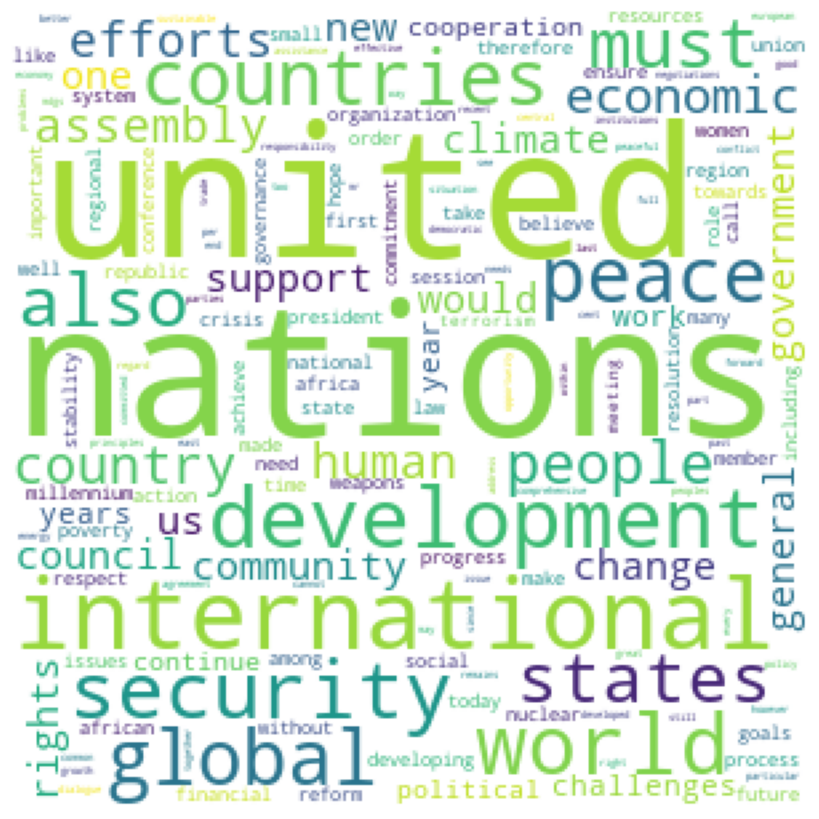

In [17]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Calculating IDF scores for tokens in the dataframe

In [18]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

### Calculating the TF-IDF values for the tokens in dataset

In [19]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

freq       tfidf
token                          
nations        2338  233.800000
united         2272  227.200000
international  2013  222.715096
development    1439  190.323381
world          1386  153.344820

### word cloud visualization based on the TF-IDF values calculated for each token

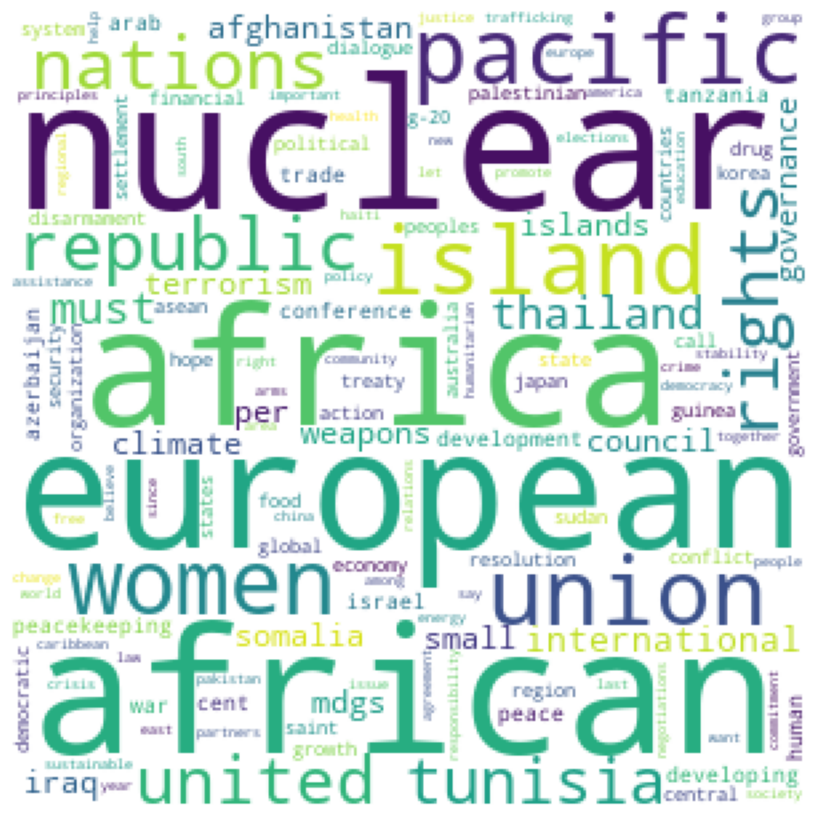

In [20]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### counts the occurrences of specific keywords within a list of tokens

In [21]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [22]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


### creating a heatmap using Seaborn to visualize the relative frequencies of specific keywords

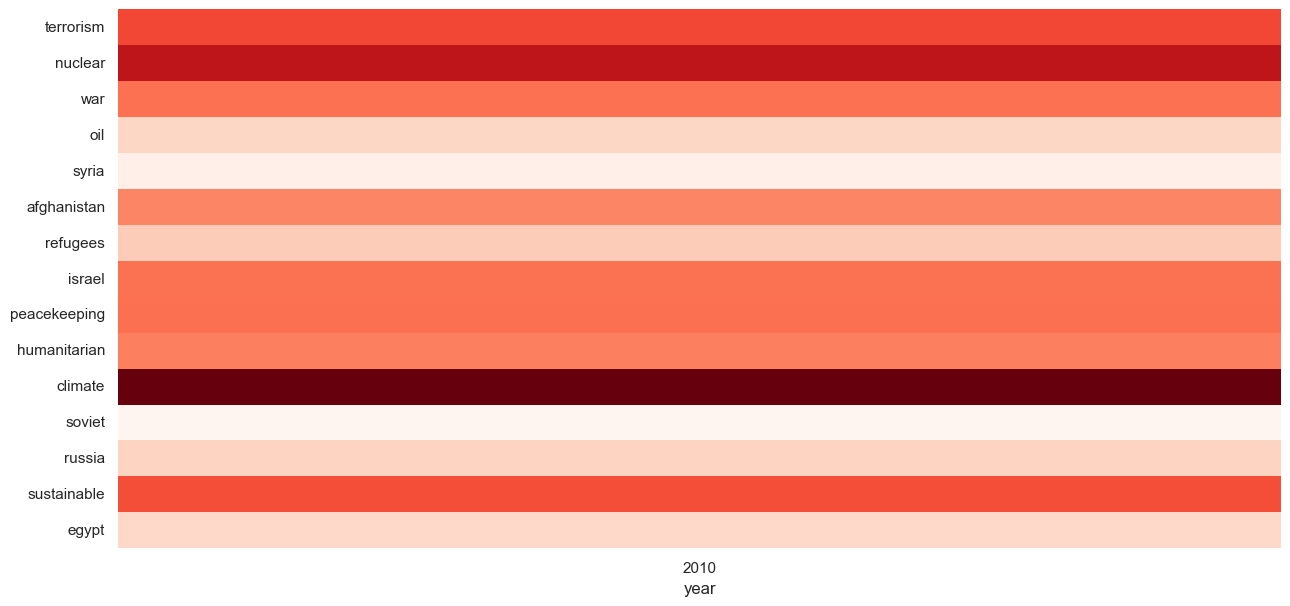

In [23]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


### For different countries

In [24]:
file = r"C:\Users\pinis\Downloads\un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df = df[df['country'].isin(['AUS', 'AFG','IND','TLS','VAT','ZMB'])]
df.head(10)

session  year country country_name           speaker position  \
2         25  1970     AUS    Australia       Mr. McMAHON      NaN   
26        25  1970     IND        India  Mr. Swaran SINGH      NaN   
69        25  1970     ZMB       Zambia    Mr. MWANAKATWE      NaN   
70        26  1971     AFG  Afghanistan       Mr. SHAJFIQ      NaN   
73        26  1971     AUS    Australia         Mr. BOWEN      NaN   
114       26  1971     IND        India   Mr. Saran SINGH      NaN   
185       26  1971     ZMB       Zambia       Mr. MUDENDA      NaN   
186       27  1972     AFG  Afghanistan        Mr. Shafiq      NaN   
190       27  1972     AUS    Australia       Mr. Bo wen       NaN   
238       27  1972     IND        India  Mr. Swaran Singh      NaN   

                                                  text  
2    100.\t  It is a pleasure for me to extend to y...  
26   40.\t Mr. President, I offer you our congratul...  
69   60.\t Mr. President, I wish, first of all, to ...  
70   82.\tMr. President, at the outset, I wish to c...  
73   38.\t  I should like, on behalf of Australia,,...  
114  38.\tMr. President, on behalf of the people of...  
185  143.\t  Mr. President, my delegation congratul...  
186  Mr. President, on behalf of the Afghan delegat...  
190  Mr. President, I should like, on behalf of the...  
238  Mr. President, I offer you on behalf of India ...

### Building a text preprocessing pipeline & 'prepare' function defined applies a preprocessing pipeline to each text in the 'text' column of the DataFrame

In [25]:
pipeline = [str.lower, tokenize, remove_stop]
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

### Calculates the frequency of each token in the 'tokens' column of the DataFrame

In [26]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = "token"
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

freq
token              
nations        4189
united         4021
international  3256
countries      2722
world          2558
peace          1898
people         1872
security       1723
development    1663
economic       1581

### Generates a word cloud visualization based on the frequency of tokens in the DataFrame freq_df

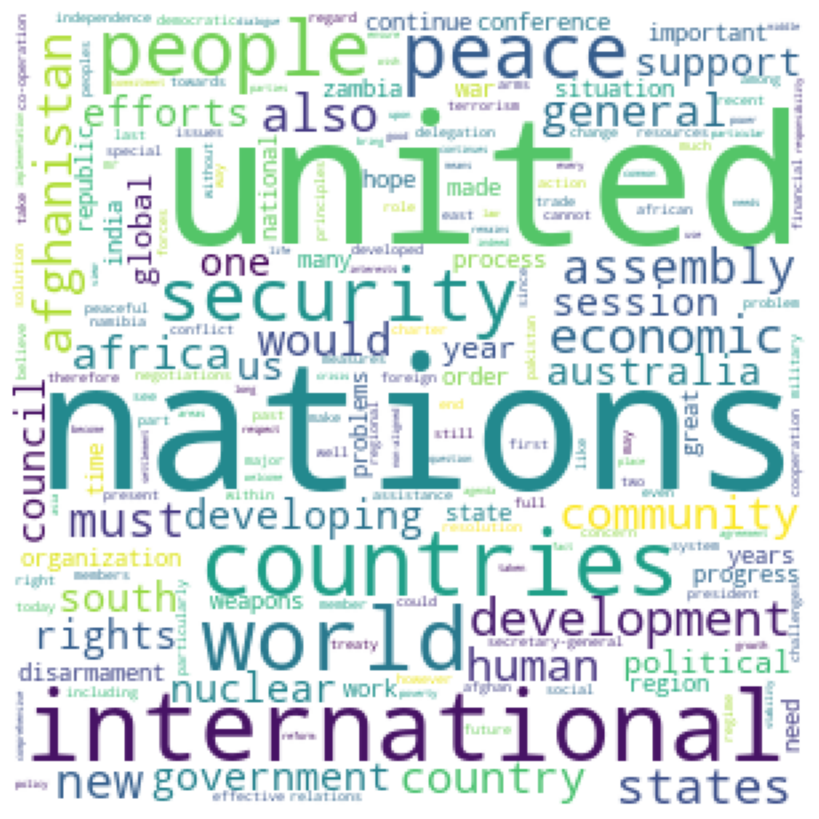

In [27]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### calculates the Inverse Document Frequency (IDF) for tokens in a DataFrame using function compute_idf

In [28]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

### Calculating the TF-IDF values for the tokens in dataset

In [29]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

freq       tfidf
token                          
nations        4189  439.484808
united         4021  402.100000
international  3256  325.600000
countries      2722  381.094521
world          2558  281.002174

### word cloud visualization based on the TF-IDF values calculated for each token

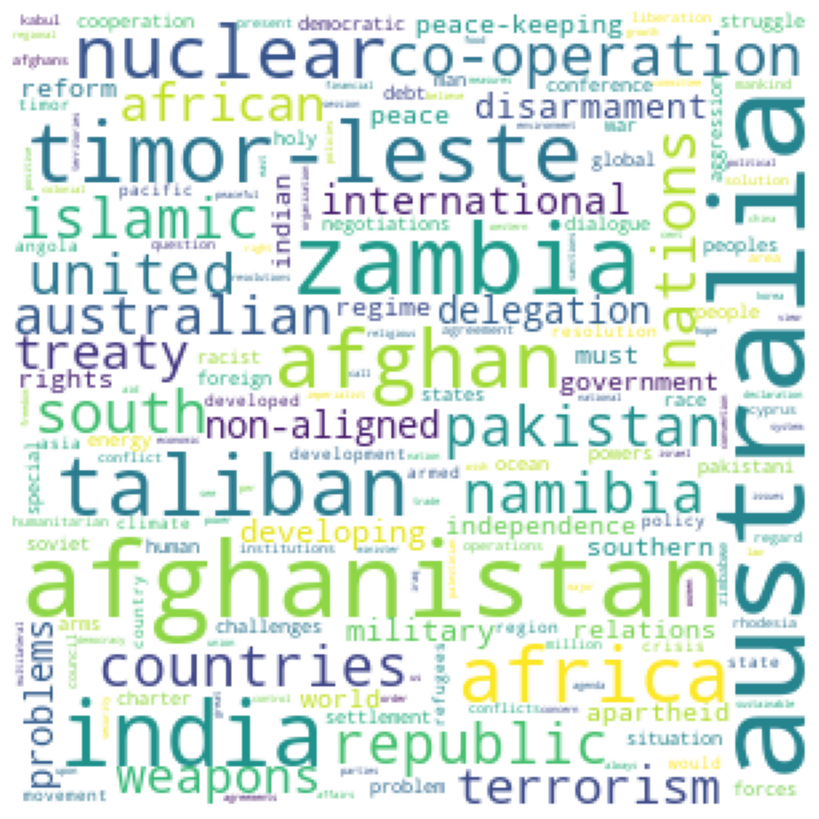

In [30]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### creating a heatmap using Seaborn to visualize the relative frequencies of specific keywords

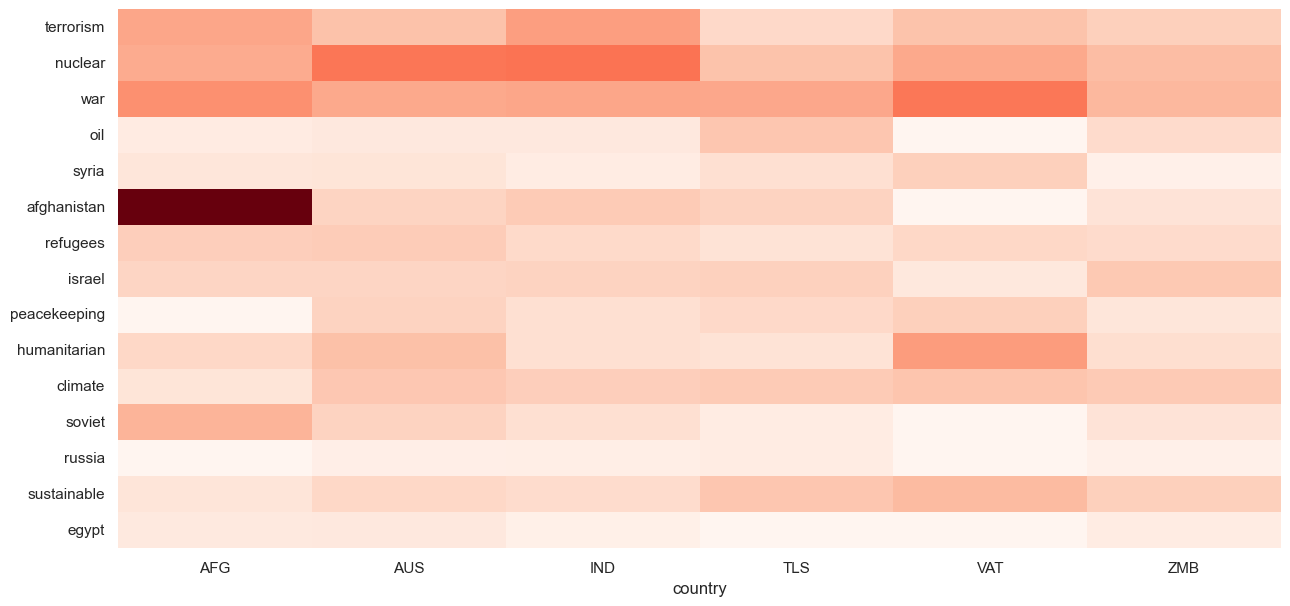

In [31]:
df['num_tokens'] = df['tokens'].map(len)
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='country', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('country')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
